### <div class="alert alert-info" align="center">Clustering - Employee Segmentation on  Absenteeism</div>

- importing required libraries

In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.neighbors import NearestNeighbors
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.facecolor':'lightblue'}) 

- loading dataset

In [219]:
df=pd.read_csv("DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv",sep=";")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


- Additional separator ; was used while loading since data was combined

- structure of dataset

In [220]:
df.shape

(740, 21)

In [221]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [222]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [223]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [224]:
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

- null/junk value checking

In [225]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

- There are no null values in the dataset and all are numerical values

- Dropping irrelevant features for clustering

In [226]:
df.drop("ID",axis=1,inplace=True)

- Month column has a value zero which is not relevant so removing that

In [227]:
i=df[df["Month of absence"]==0].index
df.drop(i,inplace=True)

In [228]:
df1=df.copy()

In [267]:
df1[df1["Height"]==0]

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours


### <div class="alert alert-info" align="center">Exploratory Data Analysis</div>

- Univariate Analysis

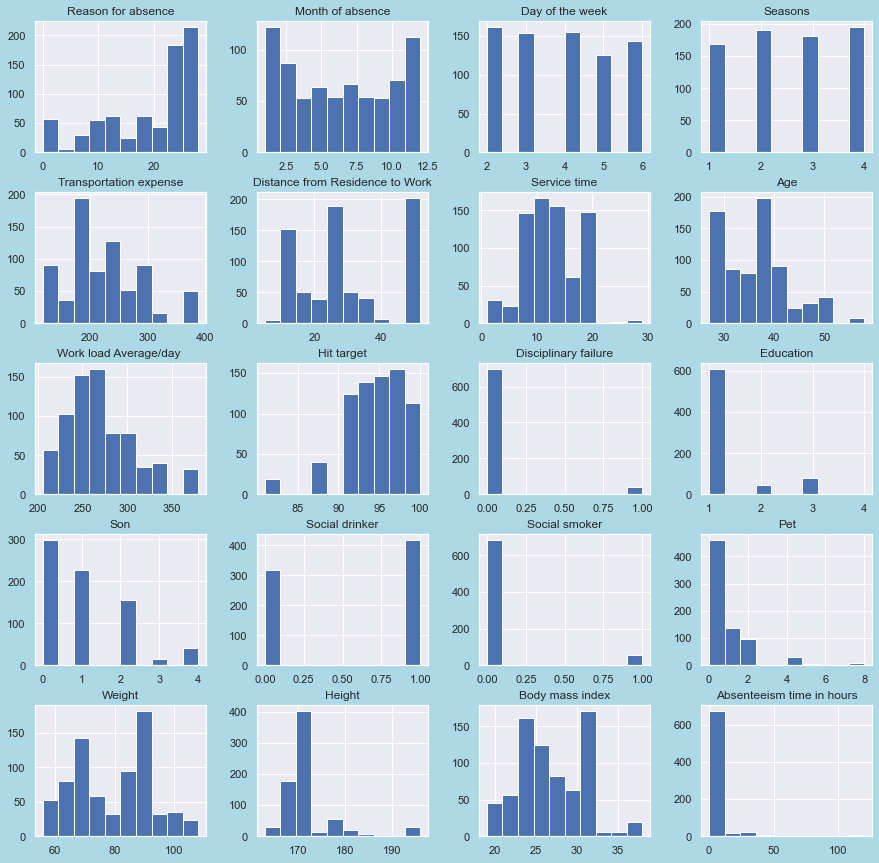

In [158]:
df.hist(figsize=(15,15))
plt.show()

- Since all are numerical values , we can observe distributions of all continuos and discrete variables here
- There are no extreme or irrelevant values like negaitves
- Values are not normally distributed

- Bivariate and Multivariate Analysis

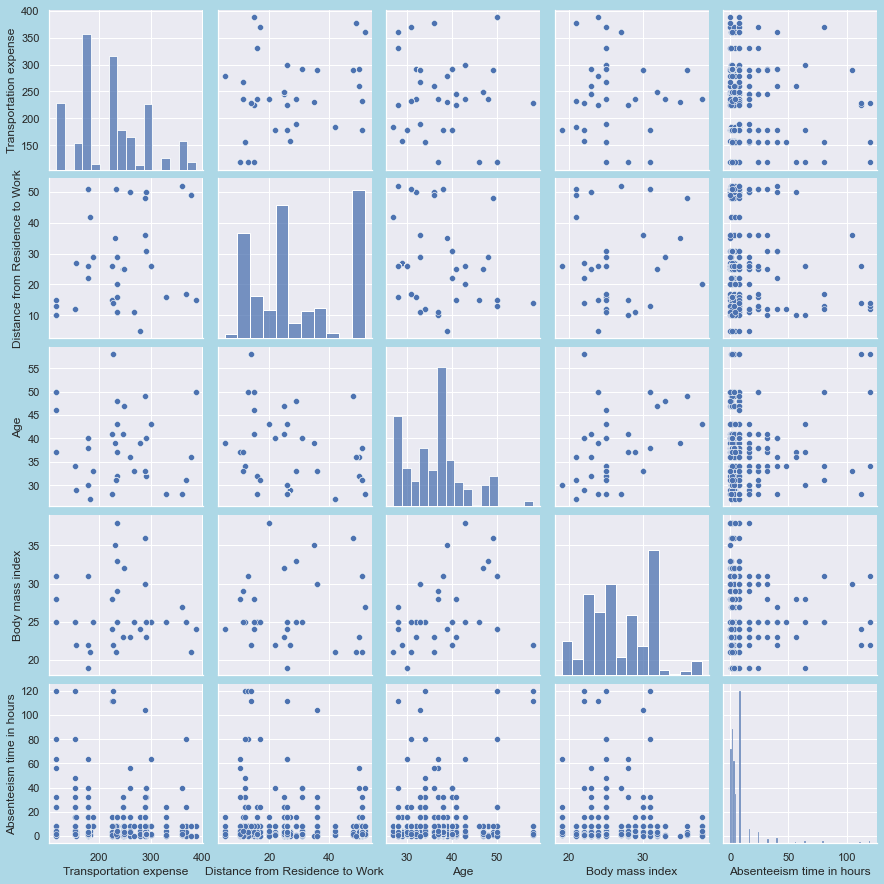

In [159]:
sns.pairplot(df[["Transportation expense","Distance from Residence to Work","Age","Body mass index","Absenteeism time in hours"]])

- Not many useful informations from this pairplot and also there is no correlation between them as such

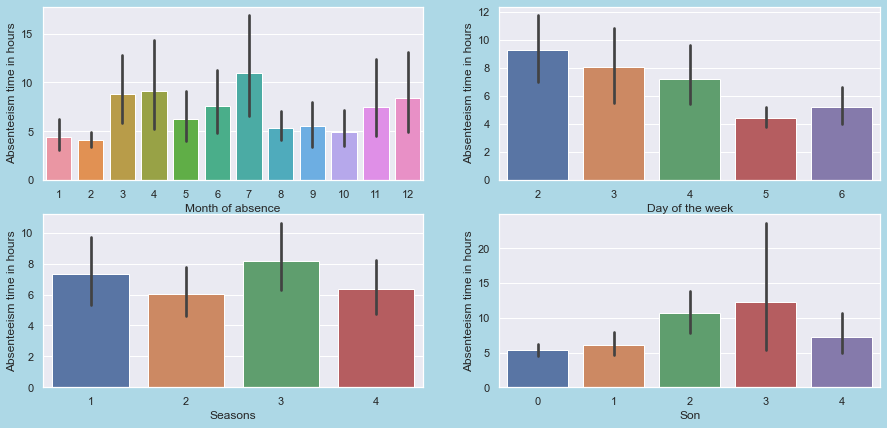

In [160]:
plt.figure(figsize=(15,7))
n=1
for i in ["Month of absence","Day of the week","Seasons","Son"]:
    plt.subplot(2,2,n)
    sns.barplot(data=df,x=i,y="Absenteeism time in hours")
    n=n+1

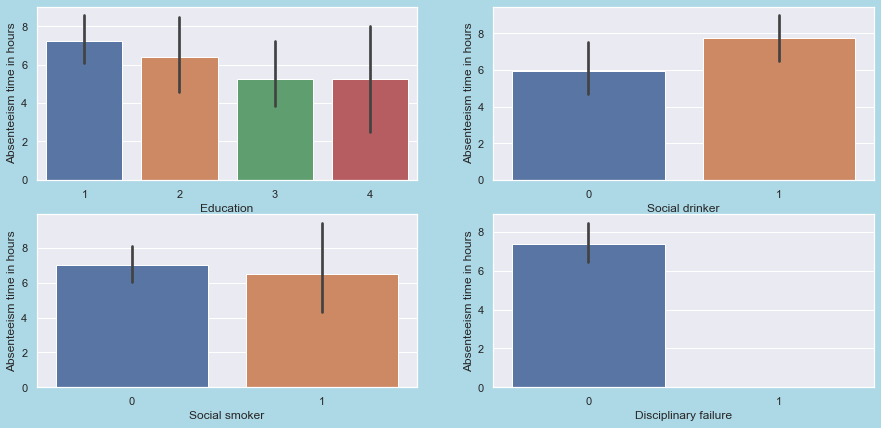

In [162]:
plt.figure(figsize=(15,7))
n=1
for i in ["Education","Social drinker","Social smoker","Disciplinary failure"]:
    plt.subplot(2,2,n)
    sns.barplot(data=df,x=i,y="Absenteeism time in hours")
    n=n+1

<AxesSubplot:xlabel='Month of absence', ylabel='Transportation expense'>

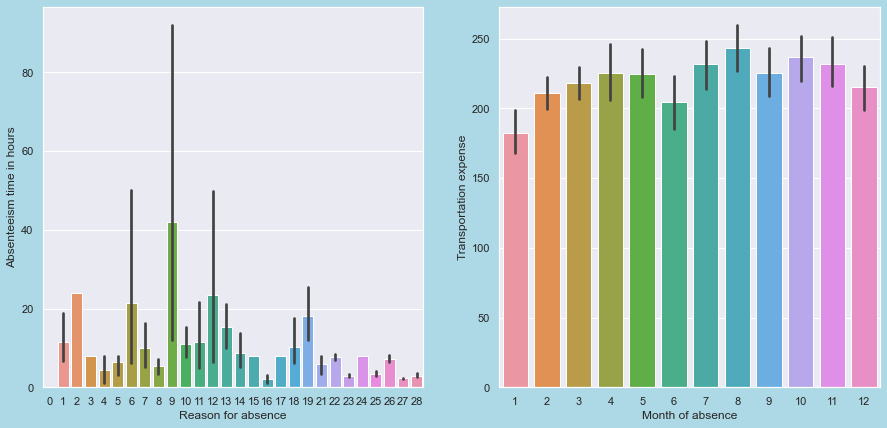

In [163]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.barplot(data=df,x="Reason for absence",y="Absenteeism time in hours")
plt.subplot(122)
sns.barplot(data=df,x="Month of absence",y="Transportation expense")

### <div class="alert alert-info" align="center">Observations</div>

- July is the top month in terms of absent hours
- Day no 2 is the top interms of absent hours
- Season 3 is top among seasons wrt absent hours
- Those who have no children have less absent hours
- Those who have education 1 are also top in absentism
- Drinkers have high absent rate
- Reason for absence 9 has high mean absent hours


- Feature Scaling

In [230]:
#scaler=StandardScaler()
scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [231]:
df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0.928571,0.545455,0.25,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.033333
1,0.000000,0.545455,0.25,0.0,0.000000,0.170213,0.607143,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.000,0.807692,0.454545,0.631579,0.000000
2,0.821429,0.545455,0.50,0.0,0.225926,0.978723,0.607143,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.000,0.634615,0.212121,0.631579,0.016667
3,0.250000,0.545455,0.75,0.0,0.596296,0.000000,0.464286,0.387097,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.000,0.230769,0.151515,0.263158,0.033333
4,0.821429,0.545455,0.75,0.0,0.633333,0.659574,0.428571,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.125,0.653846,0.272727,0.578947,0.016667


### <div class="alert alert-info" align="center">Feature Extraction using PCA</div>

- Reducing data into 4 components

In [191]:
pca=PCA(n_components=4)
df_r=pca.fit_transform(df)

In [192]:
pca.explained_variance_ratio_

array([0.22114704, 0.12708251, 0.11093641, 0.08719983])

- First column in reduced data carries 22% of information

In [193]:
df_r

array([[-0.57200461, -0.39722183, -0.00574939,  0.26948233],
       [-0.44139469, -0.04638456,  0.931236  ,  0.48275657],
       [-0.6416883 , -0.51387455,  0.08198312, -0.13802943],
       ...,
       [-0.322285  , -0.1179093 , -0.02624095,  0.91675941],
       [-0.55185035, -0.23745418,  0.07328338,  0.4754806 ],
       [ 0.64714253, -0.27440427,  0.40184267,  0.24488354]])

- Visuals of how reduced data columns 1 and 2 are scattered

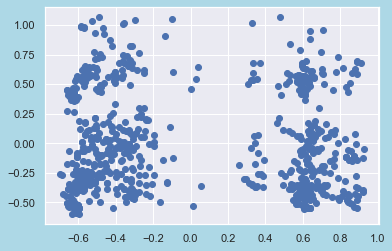

In [194]:
plt.scatter(df_r[:,0],df_r[:,1])

### <div class="alert alert-info" align="center">Clustering using K Means</div>

- Finding optimal K for K Means using Elbow method and Silhouette scores
- Elbow method is k vs wcss(within cluster sum of squares)

{2: 0.21101679010686095,
 3: 0.16929978813369315,
 4: 0.15157838607610627,
 5: 0.15237597599755662,
 6: 0.161300126753071,
 7: 0.16824374293776184,
 8: 0.16116040512772115,
 9: 0.162325068793033}

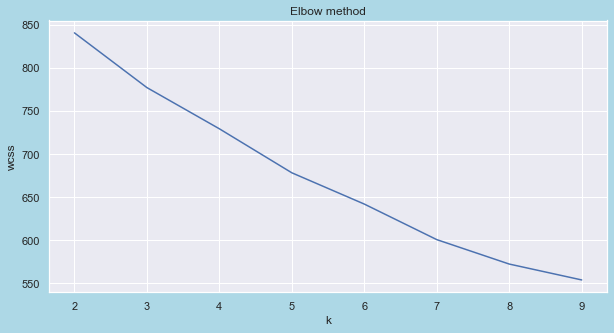

In [327]:
wcss=[]
silhoutte={}
for k in range(2,10):
    c=KMeans(n_clusters=k).fit(df)
    labels=c.labels_
    wcss.append(c.inertia_)
    silhoutte[k]=silhouette_score(df,labels)
plt.figure(figsize=(10,5))
plt.plot(range(2,10),wcss)
plt.title("Elbow method")
plt.xlabel("k")
plt.ylabel("wcss")
silhoutte

- Clustering using k found from above methods

In [207]:
model1=KMeans(n_clusters=3).fit(df)

In [211]:
labels1=model1.labels_

In [212]:
s1=silhouette_score(df,labels1)
s1

0.17110511216140514

- label counts

In [238]:
np.unique(labels1,return_counts=True)

(array([0, 1, 2]), array([172, 251, 314], dtype=int64))

- scatter plot of two features of our dataset to observe how clusteringhas happened

<AxesSubplot:xlabel='Body mass index', ylabel='Absenteeism time in hours'>

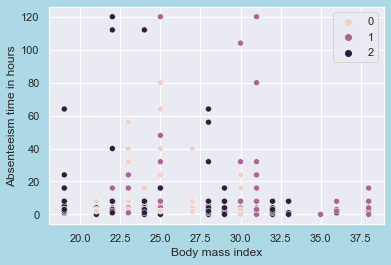

In [239]:
sns.scatterplot(data=df1,x="Body mass index",y="Absenteeism time in hours",hue=labels1)

- mean values of all features wrt labels

In [245]:
df.pivot_table(index=labels1)

,Absenteeism time in hours,Age,Body mass index,Day of the week,Disciplinary failure,Distance from Residence to Work,Education,Height,Hit target,Month of absence,Pet,Reason for absence,Seasons,Service time,Social drinker,Social smoker,Son,Transportation expense,Weight,Work load Average/day
0,0.067248,0.262566,0.320073,0.574128,0.087209,0.699530,0.013566,0.232558,0.664627,0.591438,0.159884,0.662375,0.573643,0.337625,0.994186,0.075581,0.508721,0.654027,0.332402,0.385627
1,0.061521,0.404447,0.571608,0.438247,0.051793,0.620921,0.015936,0.352167,0.719019,0.442955,0.017928,0.733921,0.455511,0.553643,0.984064,0.031873,0.159363,0.256987,0.660435,0.367858
2,0.049973,0.246045,0.313778,0.457803,0.038217,0.350183,0.209130,0.239529,0.739524,0.463521,0.113455,0.667880,0.531847,0.340651,0.000000,0.105096,0.191083,0.336176,0.327413,0.384546


- Finding K for reduced data using elbow and silhouette score

{2: 0.3671001815619817,
 3: 0.3313267609357122,
 4: 0.32374486327939894,
 5: 0.3063416456740757,
 6: 0.28803794668297633,
 7: 0.28837960880321306,
 8: 0.29109745915966667,
 9: 0.292481321025361}

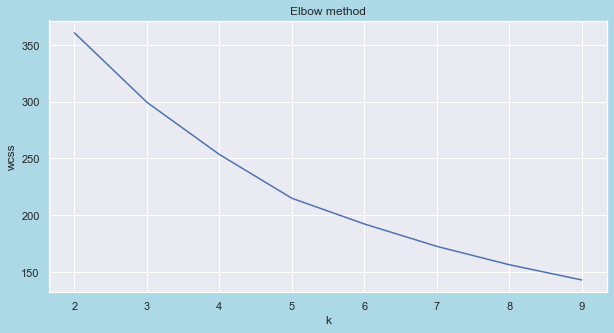

In [328]:
wcss=[]
silhoutte={}
for k in range(2,10):
    c=KMeans(n_clusters=k).fit(df_r)
    labels=c.labels_
    wcss.append(c.inertia_)
    silhoutte[k]=silhouette_score(df_r,labels)
plt.figure(figsize=(10,5))
plt.plot(range(2,10),wcss)
plt.title("Elbow method")
plt.xlabel("k")
plt.ylabel("wcss")
silhoutte

- Building Clustering Model using K found from elbow method and silhoutte score


In [241]:
model2=KMeans(n_clusters=3).fit(df_r)

In [242]:
labels2=model1.labels_

In [243]:
x1=pd.DataFrame(df_r)
x1["labels"]=labels2

- visualizing the clusters for reduced data

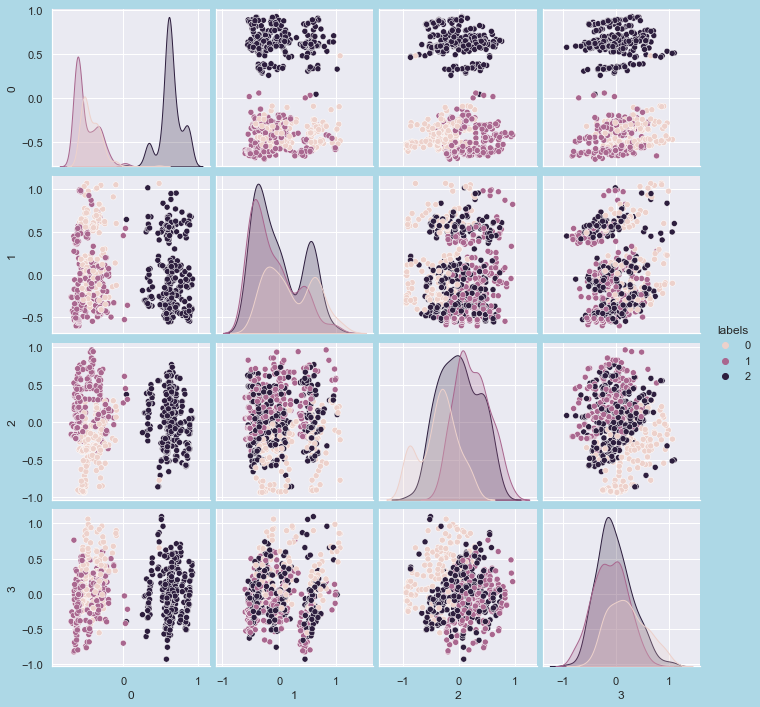

In [244]:
sns.pairplot(x1,hue='labels')

In [246]:
s2=silhouette_score(df_r,labels2)
s2

0.30524063869682444

### <div class="alert alert-info" align="center">Clustering using Agglomerative Hierarchical Clustering</div>

- Finding k using Dendrogram

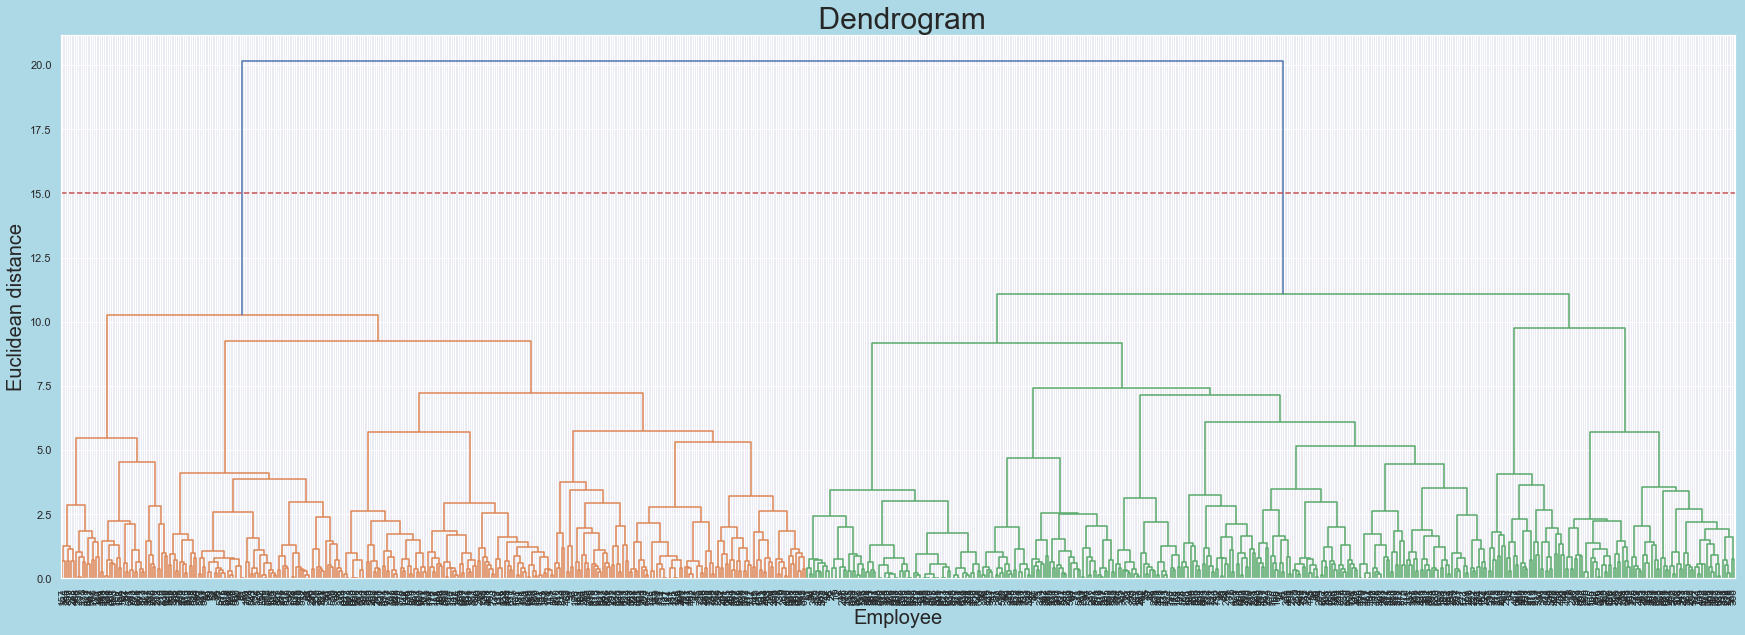

In [260]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df, method = 'ward'))
ax = plt.gca()
plt.axhline(y=15, color='r', linestyle='--')
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title(' Dendrogram',fontsize=30)
plt.xlabel('Employee',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

- Here k is found to be 2 as the red horizontal line drawn cuts the longest vertical line which has no other horizontal line cutting it

- Building clustering model using k=2

In [330]:
model3=AgglomerativeClustering(n_clusters=2).fit(df)
labels3=model3.labels_
s3=silhouette_score(df,labels3)
print("silhouette score:",s3)

silhouette score: 0.1964169804811429


In [261]:
np.unique(labels3,return_counts=True)

(array([0, 1], dtype=int64), array([409, 328], dtype=int64))

In [262]:
df.pivot_table(index=labels3)

,Absenteeism time in hours,Age,Body mass index,Day of the week,Disciplinary failure,Distance from Residence to Work,Education,Height,Hit target,Month of absence,Pet,Reason for absence,Seasons,Service time,Social drinker,Social smoker,Son,Transportation expense,Weight,Work load Average/day
0,0.062469,0.341904,0.473298,0.488386,0.085575,0.656141,0.019560,0.299696,0.693990,0.505890,0.074878,0.695599,0.517522,0.460182,0.980440,0.007335,0.300122,0.419832,0.529340,0.376895
1,0.052287,0.256393,0.315469,0.465701,0.015244,0.359043,0.195122,0.247044,0.741335,0.462029,0.112805,0.680967,0.513211,0.353005,0.051829,0.155488,0.197409,0.337940,0.333079,0.381883


- Scatterplot to visualize how clustering has happened 

<AxesSubplot:xlabel='Age', ylabel='Absenteeism time in hours'>

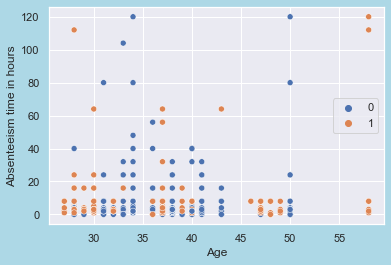

In [265]:
sns.scatterplot(data=df1,x="Age",y="Absenteeism time in hours",hue=labels3)

- Agglomerative Clustering for Reduced data

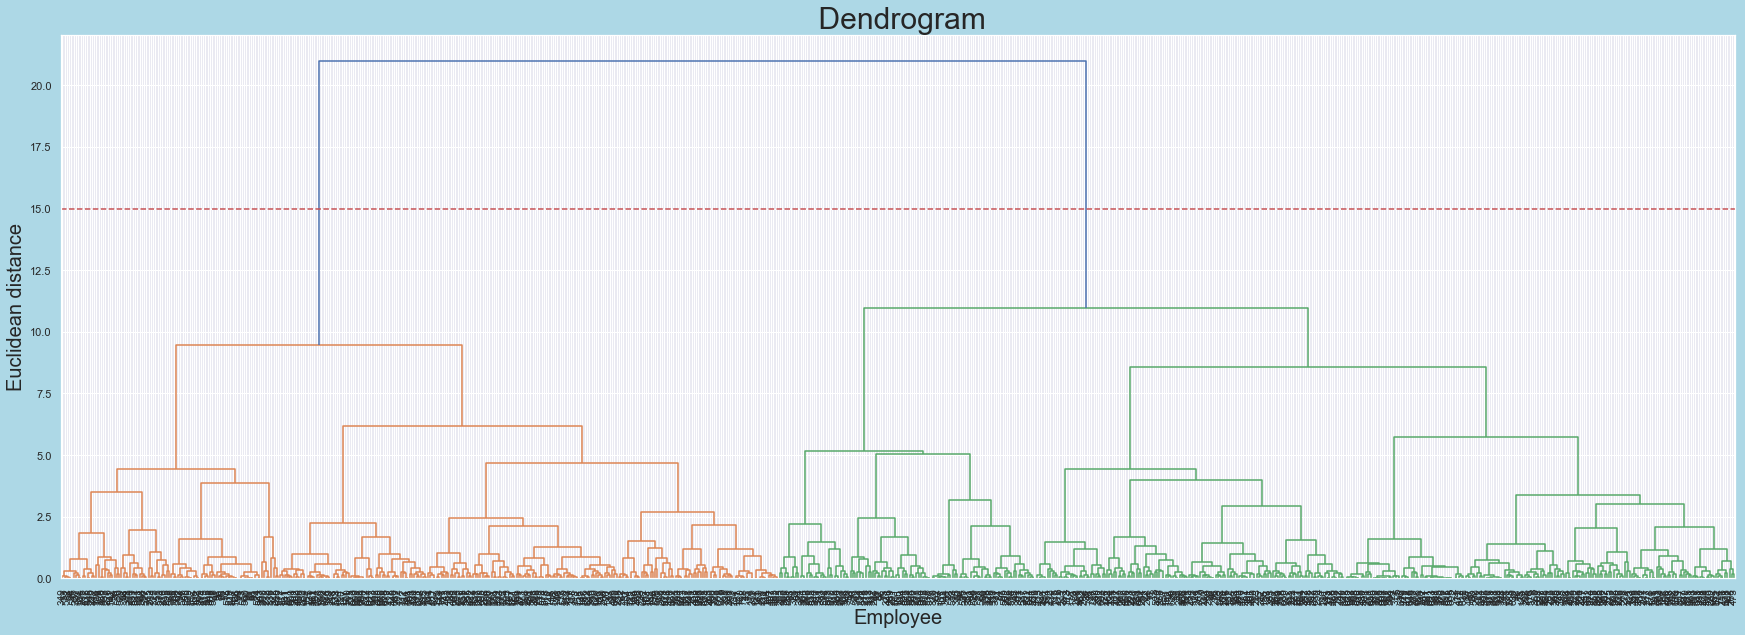

In [259]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(df_r, method = 'ward'))
ax = plt.gca()
plt.axhline(y=15, color='r', linestyle='--')
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title(' Dendrogram',fontsize=30)
plt.xlabel('Employee',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

- According to Dendrogram number of clusters as 2

In [258]:
model4=AgglomerativeClustering(n_clusters=2).fit(df_r)
labels4=model4.labels_
s4=silhouette_score(df_r,labels4)
print("silhouette score:",s4)

silhouette score: 0.3666619658032219


- Visualizng the clusters for reduced data

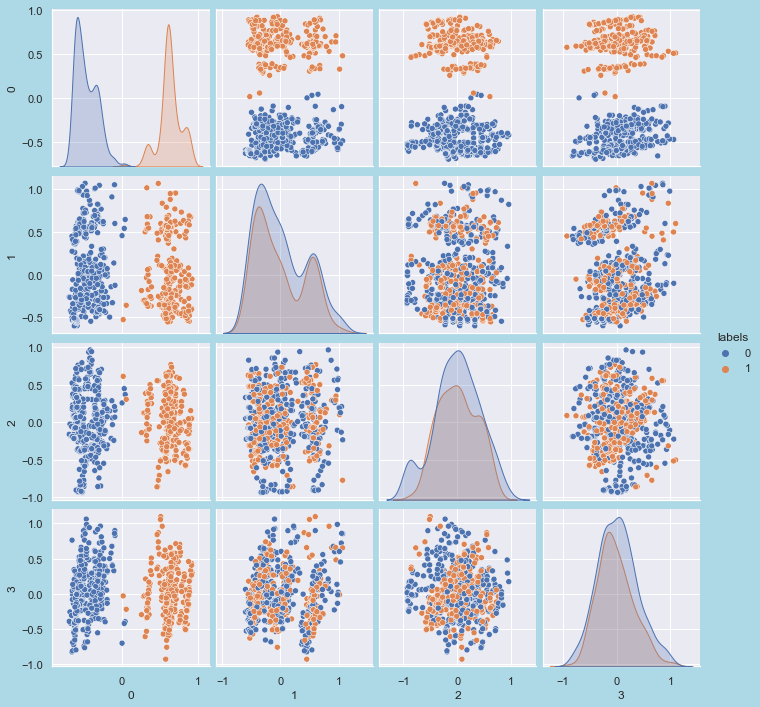

In [293]:
x2=pd.DataFrame(df_r)
x2["labels"]=labels4
sns.pairplot(x2,hue='labels')

### <div class="alert alert-info" align="center">Clustering using DBSCAN </div>

- K Distance Graph to select optimal epsilon

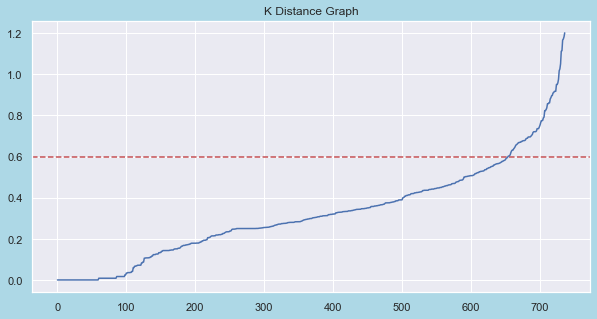

In [278]:
plt.figure(figsize=(10,5))
nn=NearestNeighbors(n_neighbors=2).fit(df)
distances,indices=nn.kneighbors(df)
distances[:,1].sort()
plt.axhline(y=0.6, color='r', linestyle='--')
plt.title("K Distance Graph")
plt.plot(distances[:,1])

- checking for optimal minimum samples based on silhoette scores

In [296]:
for eps in np.arange(0.6,0.75,0.01):
    for ms in np.arange(2,15):
        model=DBSCAN(eps=eps,min_samples=ms).fit(df)
        labels=model.labels_
        if len(np.unique(labels))<15:
            print(eps,"****",ms)
            print(np.unique(labels,return_counts=True))
            print(silhouette_score(df,labels))
            print("----")

0.6 **** 8
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64), array([352,  17, 106,  27,  51,  79,  36,  14,  31,   8,   8,   8],
      dtype=int64))
-0.0135170977750461
----
0.6 **** 9
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64), array([389,  17, 106,  51,  74,  22,  24,  31,  12,  11], dtype=int64))
-0.029063794868908317
----
0.6 **** 10
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64), array([413,  16, 101,  74,  49,  22,  21,  30,  11], dtype=int64))
-0.029481773499598116
----
0.6 **** 11
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64), array([429,  16, 101,  74,  38,  12,  18,  27,  11,  11], dtype=int64))
-0.0580569716787232
----
0.6 **** 12
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64), array([462,  16, 100,  70,  17,  16,  20,  25,  11], dtype=int64))
-0.08234500813047
----
0.6 **** 13
(array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64), array([475,  16, 100,  70,  15,  16,  20,  25], dtype=int64))
-0.08

0.67 **** 8
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64), array([254,  94, 108,  28,  53,  85,  14,  19,  42,  15,   9,   8,   8],
      dtype=int64))
0.055663134672435124
----
0.67 **** 9
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64), array([290,  93, 108,  28,  53,  85,  17,  39,  15,   9], dtype=int64))
0.05065564504568977
----
0.67 **** 10
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64), array([323,  81, 108,  85,  53,  23,  37,  16,  11], dtype=int64))
0.035654117929439205
----
0.67 **** 11
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64), array([334,  29, 108,  85,  52,  22,  43,  37,  16,  11], dtype=int64))
0.02068746437583541
----
0.67 **** 12
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64), array([361,  23, 108,  85,  52,  19,  36,  37,  16], dtype=int64))
0.008668764016097688
----
0.67 **** 13
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64), array([374,  22, 102,  85,  51,  33,  37,  16, 

0.7200000000000001 **** 14
(array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64), array([323,  78, 108,  88,  51,  22,  51,  16], dtype=int64))
0.044088376673189655
----
0.7300000000000001 **** 7
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype=int64), array([160,  99, 110,  31,  75,  22,  55,  88,  19,  24,  17,  23,   8,
         6], dtype=int64))
0.11826785405981698
----
0.7300000000000001 **** 9
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64), array([203,  99, 110,  31,  53,  88,  71,   9,  22,  19,  15,   8,   9],
      dtype=int64))
0.08457827975299606
----
0.7300000000000001 **** 10
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int64), array([244,  97, 110,  31,  88,  53,  57,  19,  10,  17,  11], dtype=int64))
0.07472498757691812
----
0.7300000000000001 **** 11
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64), array([259,  97, 110,  31,  88,  52,  53,  19,  17,  11], dtype=int64))
0.0693643936398097

- Building clustering model with selected eps and min samples

In [274]:
model5=DBSCAN(eps=0.68,min_samples=7).fit(df)
labels5=model5.labels_
s5=silhouette_score(df,labels5)
print("silhouette score:",s5)

silhouette score: 0.10023583643894031


In [288]:
np.unique(labels5,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       dtype=int64),
 array([203,  96, 108,  30,  53,  86,  51,  15,  21,  20,  20,  13,  15,
          6], dtype=int64))

<AxesSubplot:xlabel='Age', ylabel='Body mass index'>

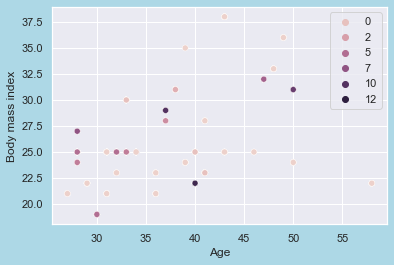

In [289]:
sns.scatterplot(data=df1,x="Age",y="Body mass index",hue=labels5)

- As observed from above graph since dbscan is a density based and here we have points are distributed far from others many are considered as outliers

- Mean values of all features for different labels

In [294]:
df1.pivot_table(index=labels5)

,Absenteeism time in hours,Age,Body mass index,Day of the week,Disciplinary failure,Distance from Residence to Work,Education,Height,Hit target,Month of absence,Pet,Reason for absence,Seasons,Service time,Social drinker,Social smoker,Son,Transportation expense,Weight,Work load Average/day
-1,11.162562,38.871921,27.014778,3.773399,0.197044,25.640394,1.359606,173.078818,93.384236,7.266010,0.970443,13.433498,2.566502,12.586207,0.605911,0.192118,1.389163,244.364532,80.714286,273.154394
0,7.572917,37.562500,26.312500,4.052083,0.000000,31.447917,1.000000,171.083333,93.812500,6.875000,0.718750,21.291667,2.458333,13.458333,1.000000,0.000000,1.093750,278.062500,77.666667,277.740875
1,4.277778,38.000000,31.000000,3.888889,0.000000,51.000000,1.000000,170.000000,95.592593,5.444444,0.000000,23.361111,2.388889,18.000000,1.000000,0.000000,0.000000,179.000000,89.000000,261.064417
2,7.966667,36.000000,23.000000,5.766667,0.000000,50.000000,1.000000,168.000000,95.033333,7.500000,0.000000,23.966667,2.700000,11.000000,1.000000,0.000000,4.000000,260.000000,65.000000,263.770100
3,6.301887,37.000000,28.000000,3.301887,0.000000,10.000000,1.000000,172.000000,94.528302,6.283019,0.000000,21.716981,2.566038,10.000000,0.000000,0.000000,0.000000,118.000000,83.000000,270.375566
4,3.720930,28.418605,23.953488,4.000000,0.000000,27.023256,1.000000,168.720930,95.116279,6.162791,1.906977,21.011628,2.848837,9.279070,0.000000,0.000000,1.046512,219.744186,68.488372,283.090640
5,3.960784,30.137255,20.372549,4.450980,0.000000,23.745098,2.901961,172.784314,96.196078,4.509804,0.019608,21.392157,2.490196,8.509804,0.000000,0.000000,0.019608,200.392157,61.235294,261.987922
6,2.600000,47.000000,32.000000,3.266667,0.000000,25.000000,1.000000,165.000000,96.000000,6.600000,1.000000,22.266667,2.933333,14.000000,0.000000,0.000000,2.000000,248.000000,86.000000,251.037400
7,6.190476,28.000000,27.000000,3.523810,0.000000,52.000000,1.000000,172.000000,94.333333,7.761905,4.000000,20.000000,2.619048,3.000000,1.000000,0.000000,1.000000,361.000000,80.000000,250.025476
8,6.800000,34.000000,25.000000,3.300000,0.000000,12.000000,1.000000,196.000000,96.000000,3.650000,0.000000,21.350000,2.400000,14.000000,1.000000,0.000000,2.000000,155.000000,95.000000,314.295450


- DBSCAN for Reduced data

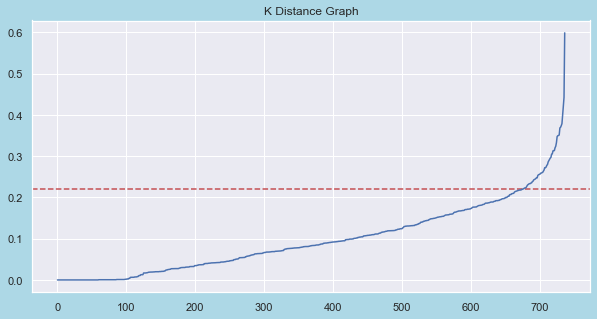

In [280]:
plt.figure(figsize=(10,5))
nn=NearestNeighbors(n_neighbors=2).fit(df_r)
distances,indices=nn.kneighbors(df_r)
distances[:,1].sort()
plt.axhline(y=0.22, color='r', linestyle='--')
plt.title("K Distance Graph")
plt.plot(distances[:,1])

- tuning min samples with metric in consideration as silhoette score

In [284]:
for eps in np.arange(0.17,0.27,0.01):
    for ms in np.arange(2,15):
        model=DBSCAN(eps=eps,min_samples=ms).fit(df_r)
        labels=model.labels_
        if len(np.unique(labels))<15:
            print(eps,"****",ms)
            print(np.unique(labels,return_counts=True))
            print(silhouette_score(df_r,labels))
            print("----")

0.17 **** 9
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64), array([514,  66,  12,  41,  20,   9,   9,  10,  13,  13,   9,  10,  11],
      dtype=int64))
-0.2264514238478234
----
0.17 **** 10
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64), array([550,  64,  12,  38,  20,  13,  10,   9,  12,   9], dtype=int64))
-0.219610703380894
----
0.17 **** 11
(array([-1,  0,  1,  2,  3,  4], dtype=int64), array([593,  64,  12,  37,  20,  11], dtype=int64))
-0.16487973817538462
----
0.17 **** 12
(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64), array([604,  42,  12,  22,  21,  20,  16], dtype=int64))
-0.22821000711861172
----
0.17 **** 13
(array([-1,  0,  1,  2,  3,  4], dtype=int64), array([620,  42,  22,  21,  17,  15], dtype=int64))
-0.23424029639436839
----
0.17 **** 14
(array([-1,  0,  1,  2,  3,  4], dtype=int64), array([629,  42,  17,  16,  17,  16], dtype=int64))
-0.24479436759753834
----
0.18000000000000002 **** 9
(array([-1,  0,  1,  2,  3,  4,  5,

0.2500000000000001 **** 11
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64), array([289, 155,  18, 134,  41,  16,  11,  14,  17,  17,  13,  12],
      dtype=int64))
-0.005216122956929103
----
0.2500000000000001 **** 12
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64), array([344, 145,  18,  97,  33,  41,  16,  16,  15,  12], dtype=int64))
-0.010494708342077318
----
0.2500000000000001 **** 13
(array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64), array([386, 135,  18,  93,  41,  16,  16,  32], dtype=int64))
0.017518046687066496
----
0.2500000000000001 **** 14
(array([-1,  0,  1,  2,  3,  4,  5], dtype=int64), array([423, 124,  18,  86,  41,  31,  14], dtype=int64))
0.03379750322757205
----
0.2600000000000001 **** 4
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64), array([ 67, 293, 201,  86,  47,  21,   4,   5,   6,   7], dtype=int64))
0.18217163525014454
----
0.2600000000000001 **** 5
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64

- Clustering using DBSCAN using hyperparameters found from above methods

In [285]:
model6=DBSCAN(eps=0.26,min_samples=4).fit(df_r)
labels6=model6.labels_
s6=silhouette_score(df_r,labels6)
print("silhouette score:",s6)

silhouette score: 0.18217163525014454


- Visualizing the clusters on reduced data

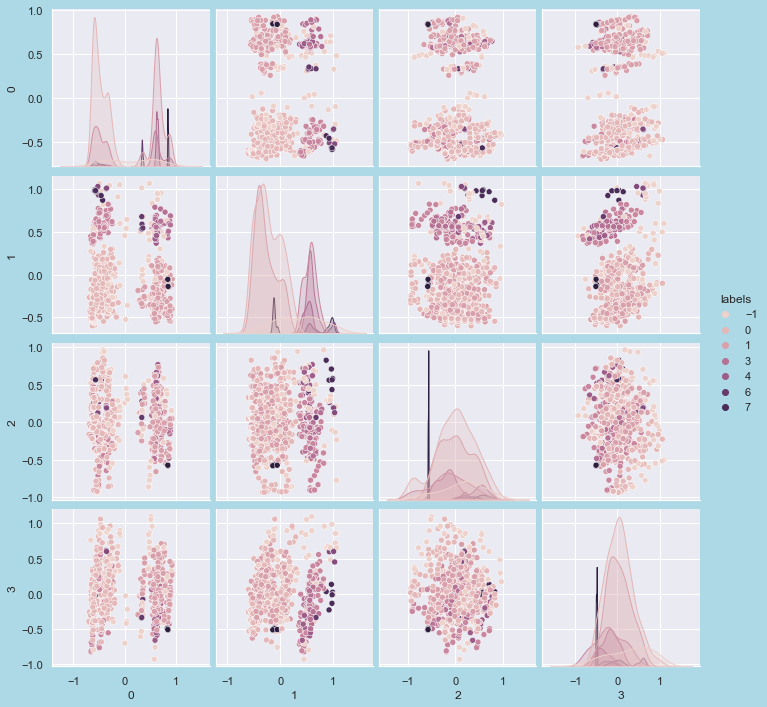

In [292]:
x3=pd.DataFrame(df_r)
x3["labels"]=labels6
sns.pairplot(x3,hue='labels')

### <div class="alert alert-info" align="center">Conclusions </div>

In [301]:
d={"K Means":[s1,s2],"Agglomerative":[s3,s4],"DBSCAN":[s5,s6]}
pd.DataFrame(d,index=["with original data","with reduced data"])

,K Means,Agglomerative,DBSCAN
with original data,0.171105,0.196417,0.100236
with reduced data,0.305241,0.366662,0.182172


- Applied The Principal Component Analysis which is a popular unsupervised learning technique for reducing the dimensionality of  data
- Used both the original data and the reduced data to form clusters
- Applied Different clustering techniques like K Means,Agglomerative Hierarachical and DBSCAN clustering
- Evaluation metric used was Silhoutte score
- Since we just went by metrics and not by number of clusters as fixed based on business needs/domain knowledge this is the result obtained.
- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation)
- All the clustering techniques when used with reduced data got high silhouette score
- Highest Silhouette score was obtained by Agglomerative Clustering on reduced data.This can be considered as the best for our dataset


In [303]:
df2=df1.copy()
df2["labels"]=labels4
df2.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,labels
0,26,7,3,1,289,36,13,33,239.554,97,...,1,2,1,0,1,90,172,30,4,0
1,0,7,3,1,118,13,18,50,239.554,97,...,1,1,1,0,0,98,178,31,0,0
2,23,7,4,1,179,51,18,38,239.554,97,...,1,0,1,0,0,89,170,31,2,0
3,7,7,5,1,279,5,14,39,239.554,97,...,1,2,1,1,0,68,168,24,4,0
4,23,7,5,1,289,36,13,33,239.554,97,...,1,2,1,0,1,90,172,30,2,0


In [304]:
df2["labels"].value_counts()

0    421
1    316
Name: labels, dtype: int64

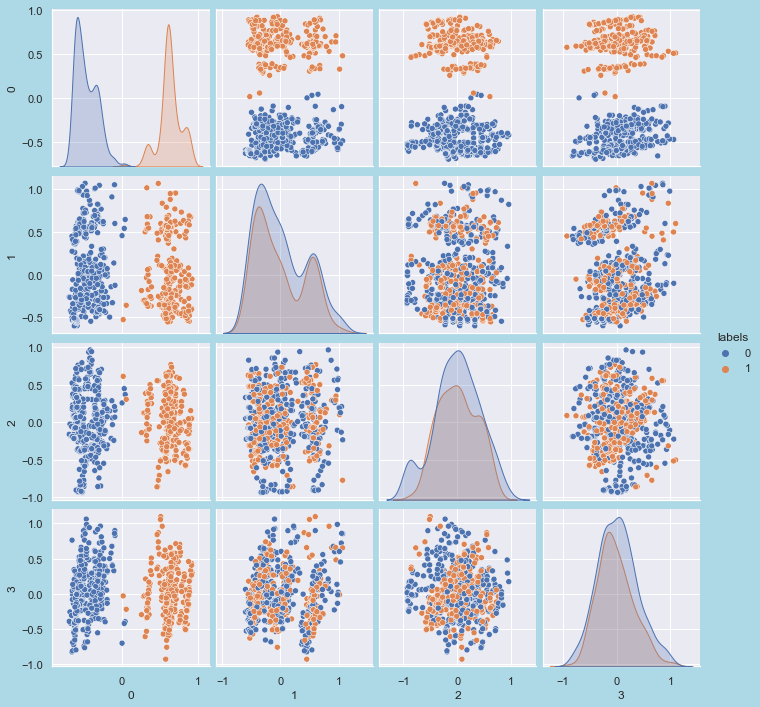

In [305]:
sns.pairplot(x2,hue='labels')

In [312]:
w=pd.DataFrame(df_r)
w.pivot_table(index=labels4)

,0,1,2,3
0,-0.473343,0.009252,-0.005399,0.016678
1,0.630624,-0.012326,0.007193,-0.022220


- cluster 0 :can be considered as the one which has high values for columns 1 and 3 in the reduced dataset
- cluster 1: can be considered as which has high values of column 0,2 
- Since this is reduced data these are unnamed here.
- Otherwise we could name this accordingly their features values in the clusters